In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scipy.cluster.hierarchy as shc

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer  # jika tidak bisa, jalankan perintah pip install yellowbrick
from sklearn.cluster import AgglomerativeClustering

# surpress future warning
import warnings
warnings.filterwarnings("ignore")

# Membuat visualisasi yang dihasilkan lebih tajam
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

In [ ]:
def compute_silhouette_coef(df: pd.DataFrame, k_lower: int, k_upper: int):
    print("Komparasi silhouette coefficient untuk k berbeda:")
    print("=================================================")
    for k in [*range(k_lower, k_upper+1)]:
        # Mendefinisikan model K-Means dengan nilai k tertentu
        clusterer = KMeans(n_clusters = k)


        # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
        cluster_labels = clusterer.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        print(
            f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}"
        )

In [ ]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/Bintang-Satwika/pemula/main/folder1/gender.csv')
df.drop('gender', axis=1, inplace=True)
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [ ]:
print(f"Ukuran dataset: {df.shape}")

Ukuran dataset: (5001, 7)


In [ ]:
# Melihat informasi dasar dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 273.6 KB


In [ ]:
# Melihat deskripsi statistik dasar dari kolom
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# TODO: penanganan
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
dtype: int64

<AxesSubplot: >

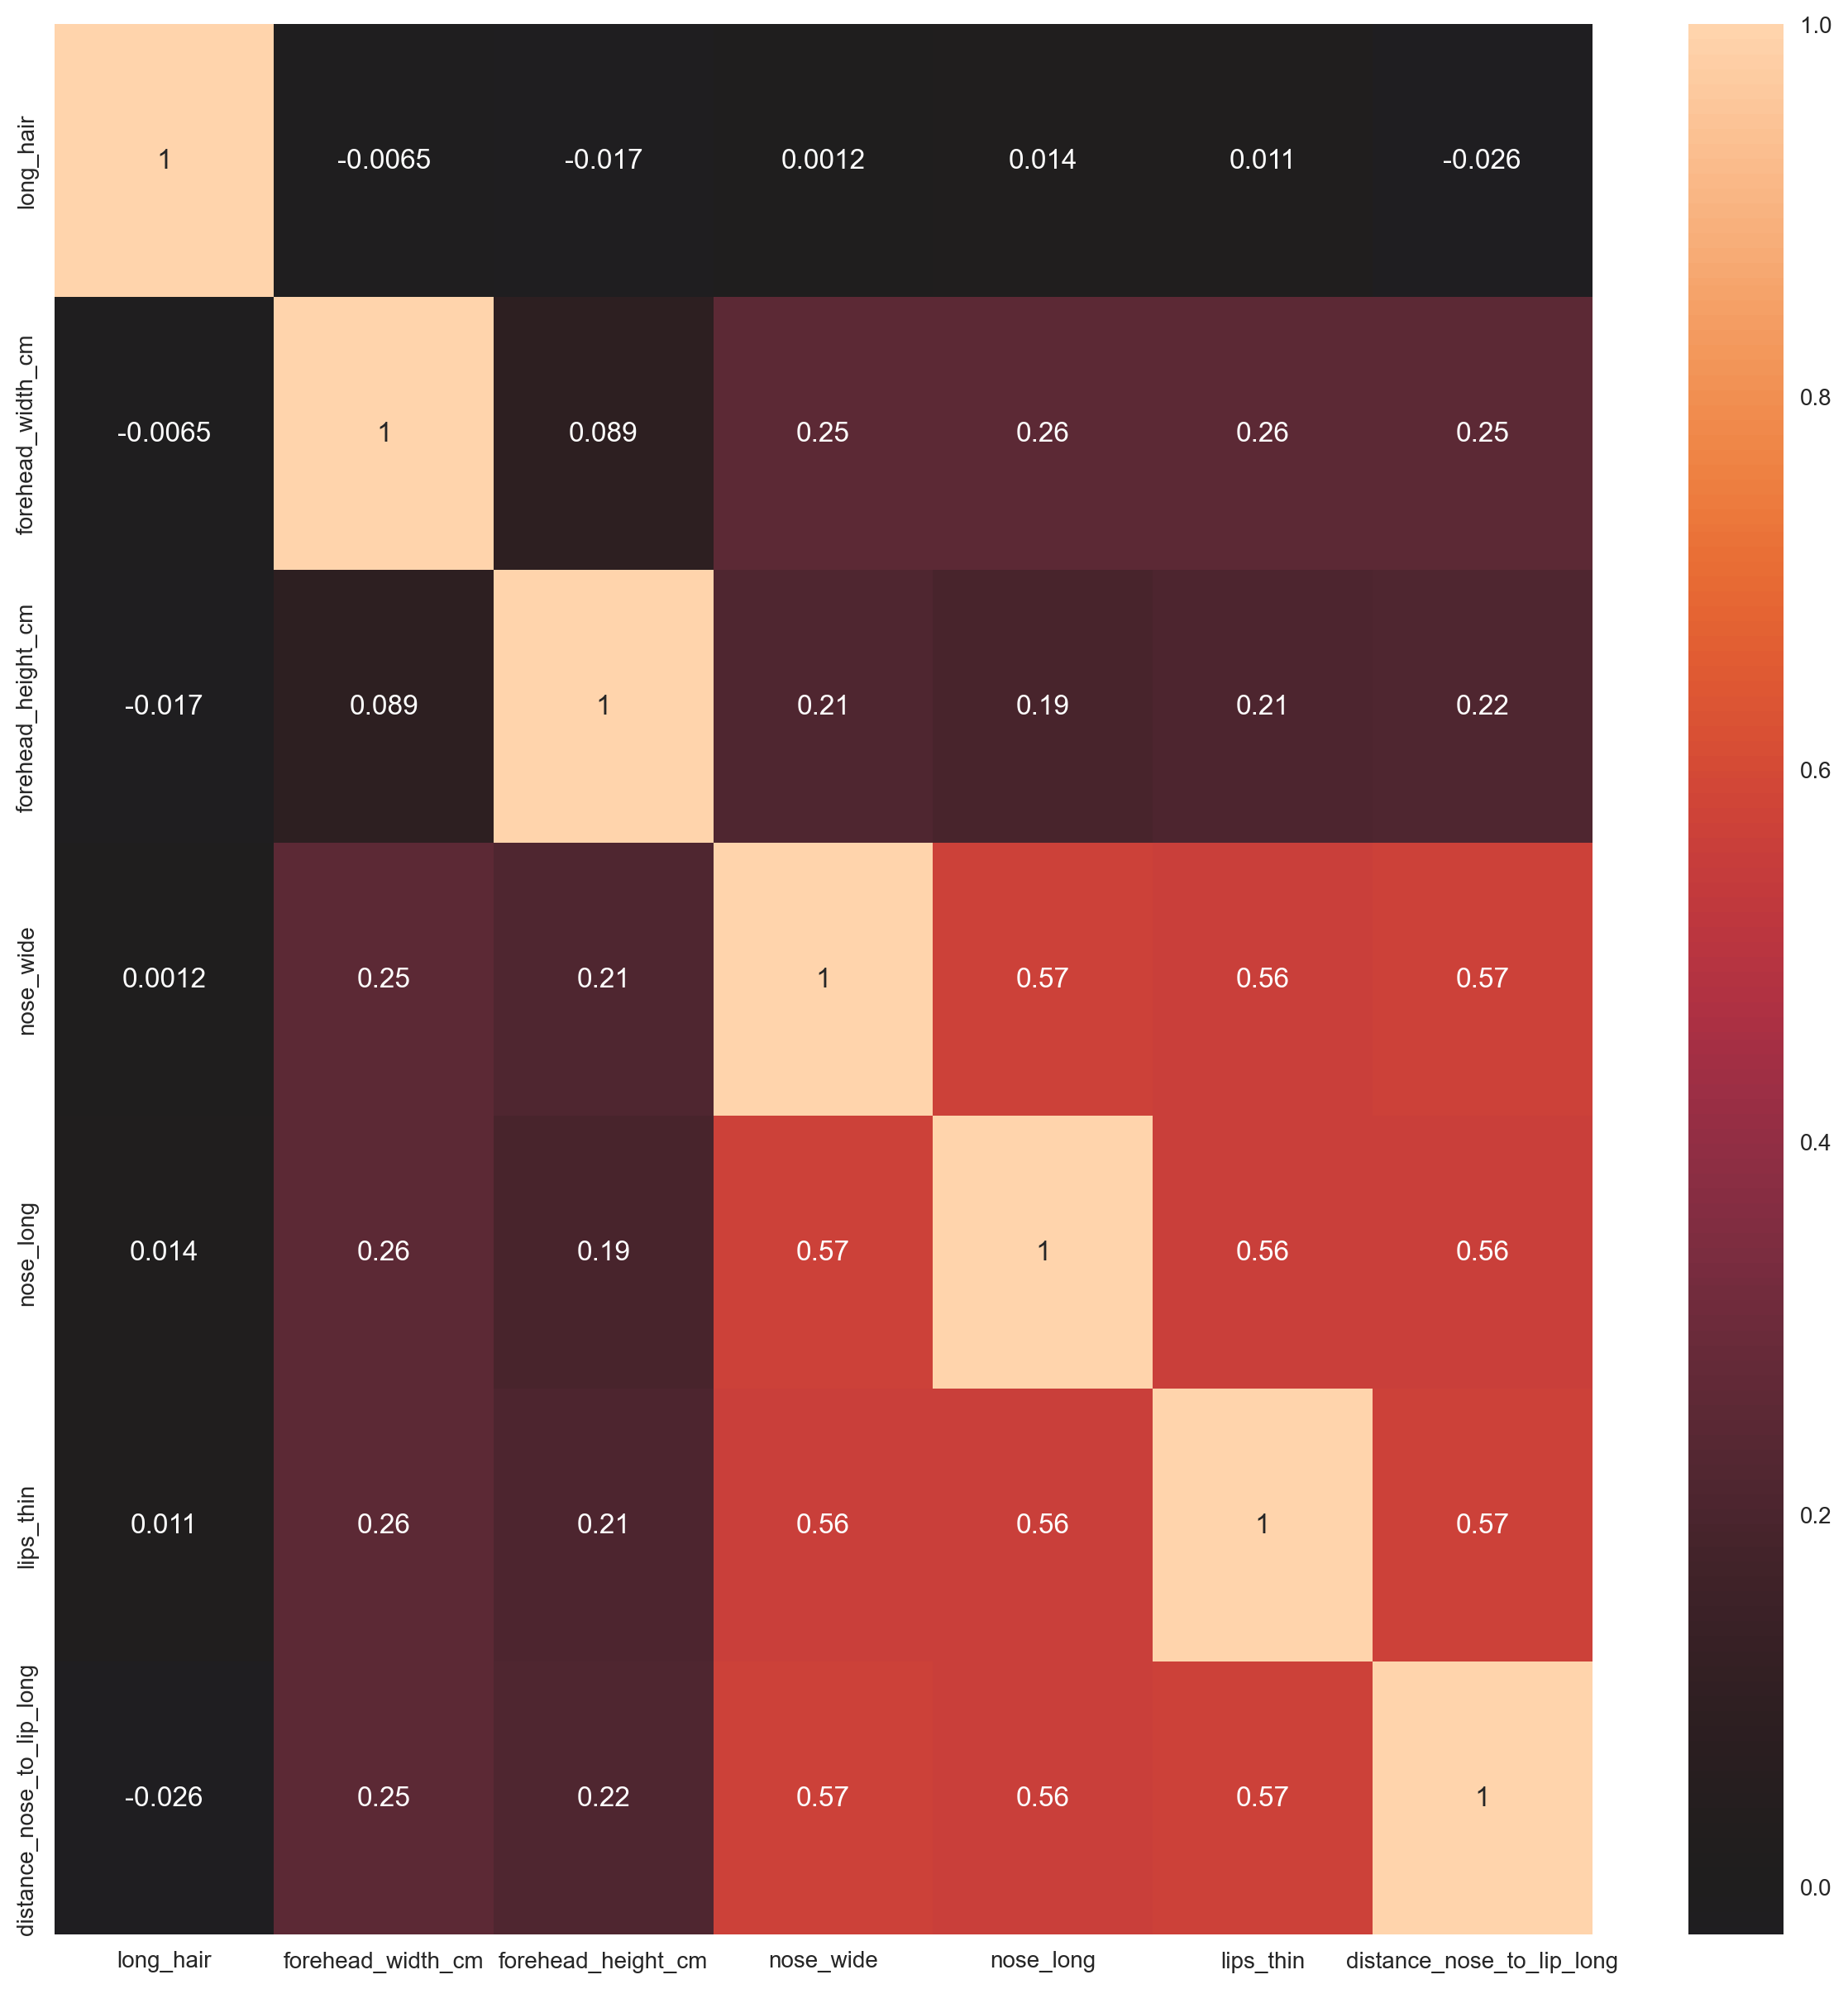

In [ ]:
#correlation matrix sesudah normalisasi
corrmat= df.corr(numeric_only=True)
plt.figure(figsize=(15,15))
sns.heatmap(corrmat,annot=True, center=0)

TODO:  Missing Value <br>
Kami menggunakan KNN Imputer karena dapat mengisi missing values karena knn mencari tetangga terdekat dari fitur-fitur lain  sehingga akan memberikan imputasi yang lebih akurat dibandingkan dengan menggunakan simple imputer (mean, modus, atau median). Selain itu, KNN Imputer tetap mempertahankan  korelasi antar fitur ketika sudah di isi.
> sumber: https://medium.com/@blant.jesse/imputing-missing-values-with-the-new-knnimputer-and-iterativeimputer-methods-110270738c4

In [ ]:
# TODO: penanganan
df_clean=df.copy()
data=df_clean.select_dtypes(exclude=object)
Q1 = np.percentile(data, 25, axis=0)
Q3 = np.percentile(data, 75, axis=0)
IQR = Q3 - Q1

# Define a threshold for detecting outliers
threshold = 1.5

# Detect outliers using the IQR method
outliers = (data < (Q1 - threshold * IQR)) | (data > (Q3 + threshold * IQR))

# Print the number of outliers detected for each feature
print("Number of outliers detected for each feature:")
print(np.sum(outliers, axis=0))

Number of outliers detected for each feature:
long_hair                    652
forehead_width_cm              0
forehead_height_cm             0
nose_wide                      0
nose_long                      0
lips_thin                      0
distance_nose_to_lip_long      0
dtype: int64


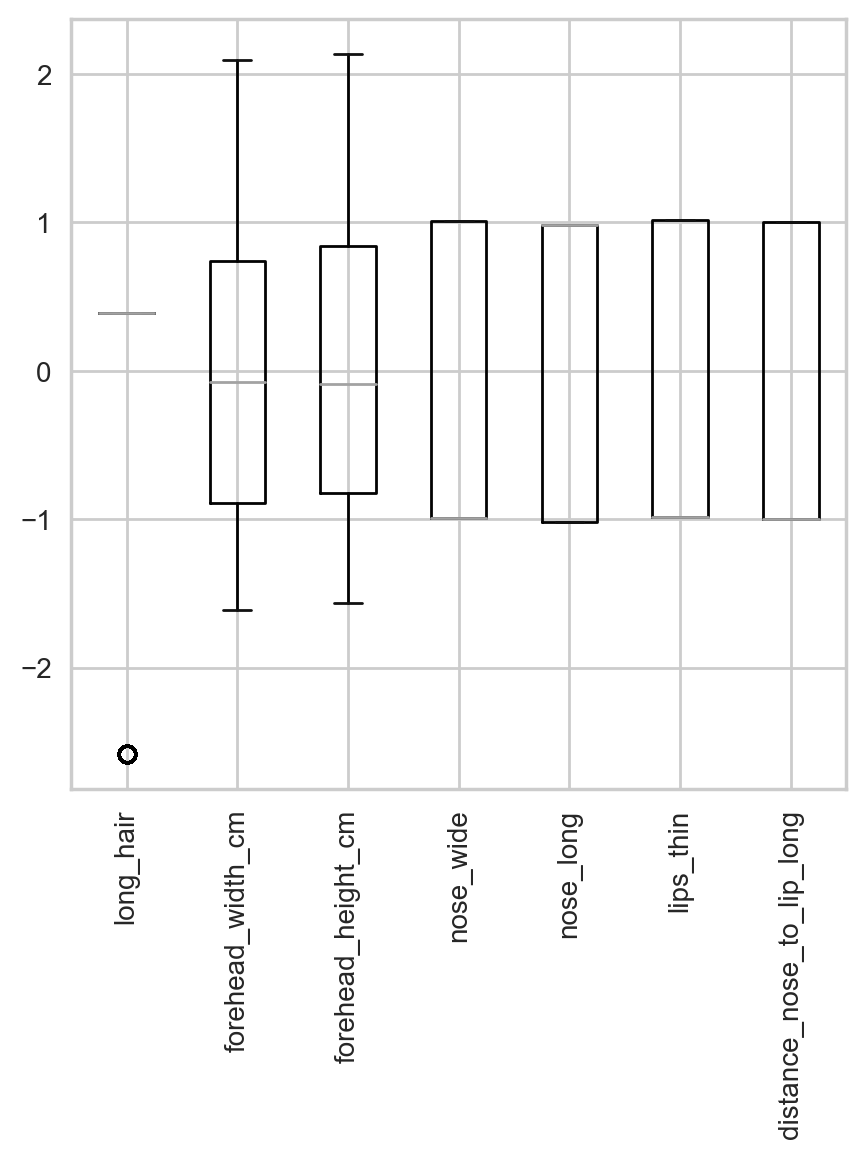

In [ ]:
from sklearn.preprocessing import StandardScaler
data= df_clean
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data =pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.boxplot(figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize
# Menggunakan nilai outlier
clean_scaled_data = scaled_data.copy()
for col in clean_scaled_data.columns:
    if clean_scaled_data[col].dtypes != 'object': # penanganan outlier khusus untuk numerikal
        Q1=clean_scaled_data[col].quantile(0.25)
        Q3=clean_scaled_data[col].quantile(0.75)
        IQR=Q3-Q1
        upper_whisker= Q3 +1.5*IQR
        lower_whisker=Q1 -1.5*IQR
        # nilai outlier akan diganti oleh batasan upper whisker atau lower whisker
        clean_scaled_data[col] =np.where(clean_scaled_data[col]>upper_whisker, upper_whisker,
                                   np.where(clean_scaled_data[col]<lower_whisker, lower_whisker, clean_scaled_data[col]) )

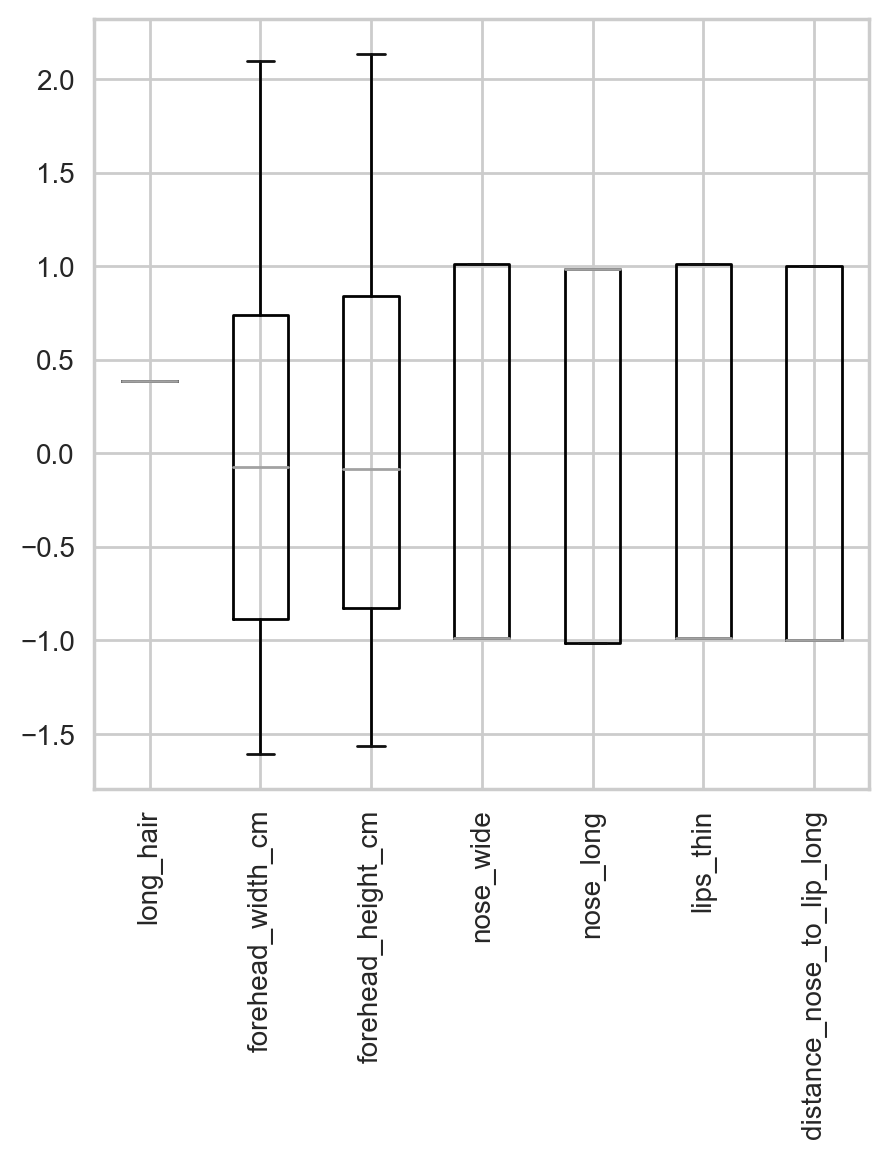

In [ ]:
clean_scaled_data.boxplot(figsize=(5,5))
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_final=clean_scaled_data.copy()
df_final

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,0.387194,-1.247933,0.283971,1.012273,-1.015924,1.013894,1.002202
1,0.387194,0.739389,-1.009418,-0.987876,-1.015924,1.013894,-0.997803
2,0.387194,-1.247933,0.653511,1.012273,0.984326,1.013894,1.002202
3,0.387194,1.100720,0.283971,-0.987876,0.984326,1.013894,1.002202
4,0.387194,0.287725,-0.085568,-0.987876,-1.015924,-0.986297,-0.997803
...,...,...,...,...,...,...,...
4996,0.387194,0.378057,-1.563727,-0.987876,-1.015924,-0.986297,-0.997803
4997,0.387194,-1.157600,-1.009418,-0.987876,-1.015924,-0.986297,-0.997803
4998,0.387194,-0.254272,-0.455108,-0.987876,-1.015924,-0.986297,-0.997803
4999,0.387194,0.016726,0.468741,-0.987876,-1.015924,-0.986297,-0.997803


In [ ]:
def PCA_komputasi(X_scaled):
    covariance_matrix = np.cov(X_scaled, rowvar=False)
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

    # sorting nilai eigen values dan eigen values dari tinggi ke rendah
    tinggi_ke_rendah = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[tinggi_ke_rendah]
    eigen_vectors = eigen_vectors[ : , tinggi_ke_rendah]

    #explained_variances dari principal component
    explained_variances =np.array(eigen_values / np.sum(eigen_values) * 100)

    return eigen_values, eigen_vectors, explained_variances

In [ ]:
eigen_values, eigen_vectors, explained_variances= PCA_komputasi(df_final)
print(explained_variances)
print(np.cumsum(explained_variances))

[48.72549875 15.30641541 14.13221157  7.38329857  7.33548844  7.11708726
  0.        ]
[ 48.72549875  64.03191417  78.16412573  85.5474243   92.88291274
 100.         100.        ]


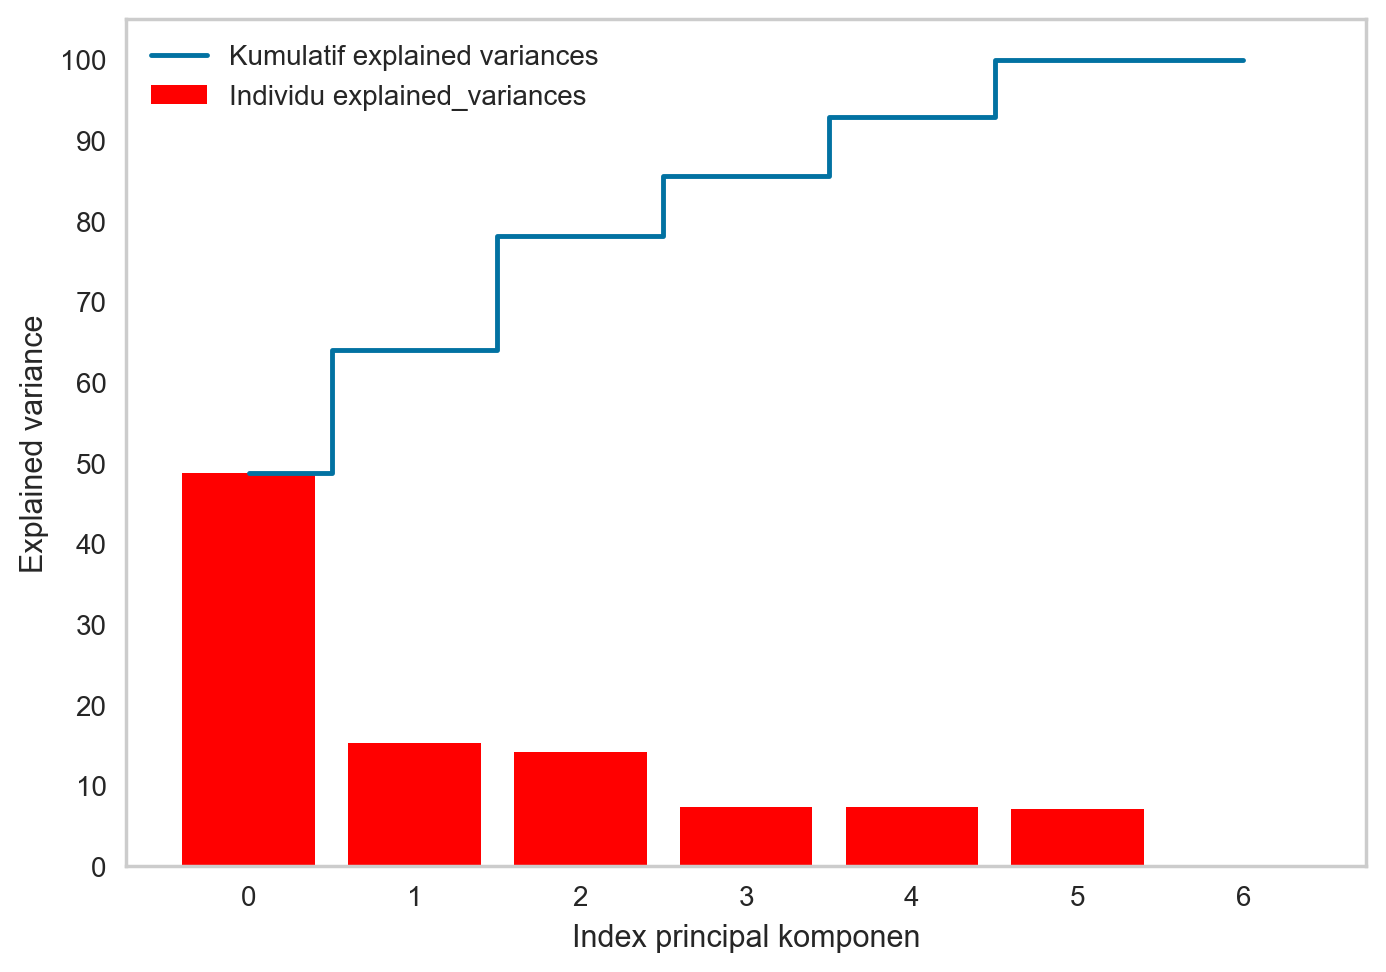

In [ ]:
sumbu_y=np.cumsum(explained_variances)
sumbu_x = np.arange(len(sumbu_y))
plt.step(y=sumbu_y, x=sumbu_x, where='mid')
plt.bar(height=explained_variances, x=sumbu_x,color='red')
plt.xlabel("Index principal komponen")
plt.ylabel("Explained variance")
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.legend(["Kumulatif explained variances", "Individu explained_variances"])
plt.show()

In [ ]:
jumlah_komponen=3
df_clustering=np.matmul(df_final, eigen_vectors[:, :jumlah_komponen])
df_clustering

,0,1,2
0,0.687642,-0.747234,1.293101
1,-0.961830,1.144542,-0.602808
2,1.705924,-0.940431,1.488053
3,1.292584,0.322751,-0.741971
4,-1.821467,0.022107,-0.864728
...,...,...,...
4996,-2.114788,1.391998,-0.387077
4997,-2.394179,0.242143,0.737042
4998,-2.041183,0.125427,-0.255376
4999,-1.772954,-0.592047,-0.838073


In [ ]:
df_clustering.dtypes

0    float64
1    float64
2    float64
dtype: object

In [ ]:
# TODO: silhouette coef
from sklearn.metrics import silhouette_samples, silhouette_score
def compute_silhouette_coef(df: pd.DataFrame, k_lower: int, k_upper: int):
    print("Komparasi silhouette coefficient untuk k berbeda:")
    print("=================================================")
    for k in [*range(k_lower, k_upper+1)]:
        # Mendefinisikan model K-Means dengan nilai k tertentu
        clusterer = KMeans(n_clusters = k)

        # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
        cluster_labels = clusterer.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        print(
            f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}"
        )

In [ ]:
len=8
compute_silhouette_coef(df_clustering, 2, len)

Komparasi silhouette coefficient untuk k berbeda:
Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.46378486521395473
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.39591861763605285
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.39044205955098676
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.2868857890272974
Untuk k = 6, rata-rata silhouette_coefficient adalah: 0.29584332415003034
Untuk k = 7, rata-rata silhouette_coefficient adalah: 0.2983205976098335
Untuk k = 8, rata-rata silhouette_coefficient adalah: 0.3099852769711844


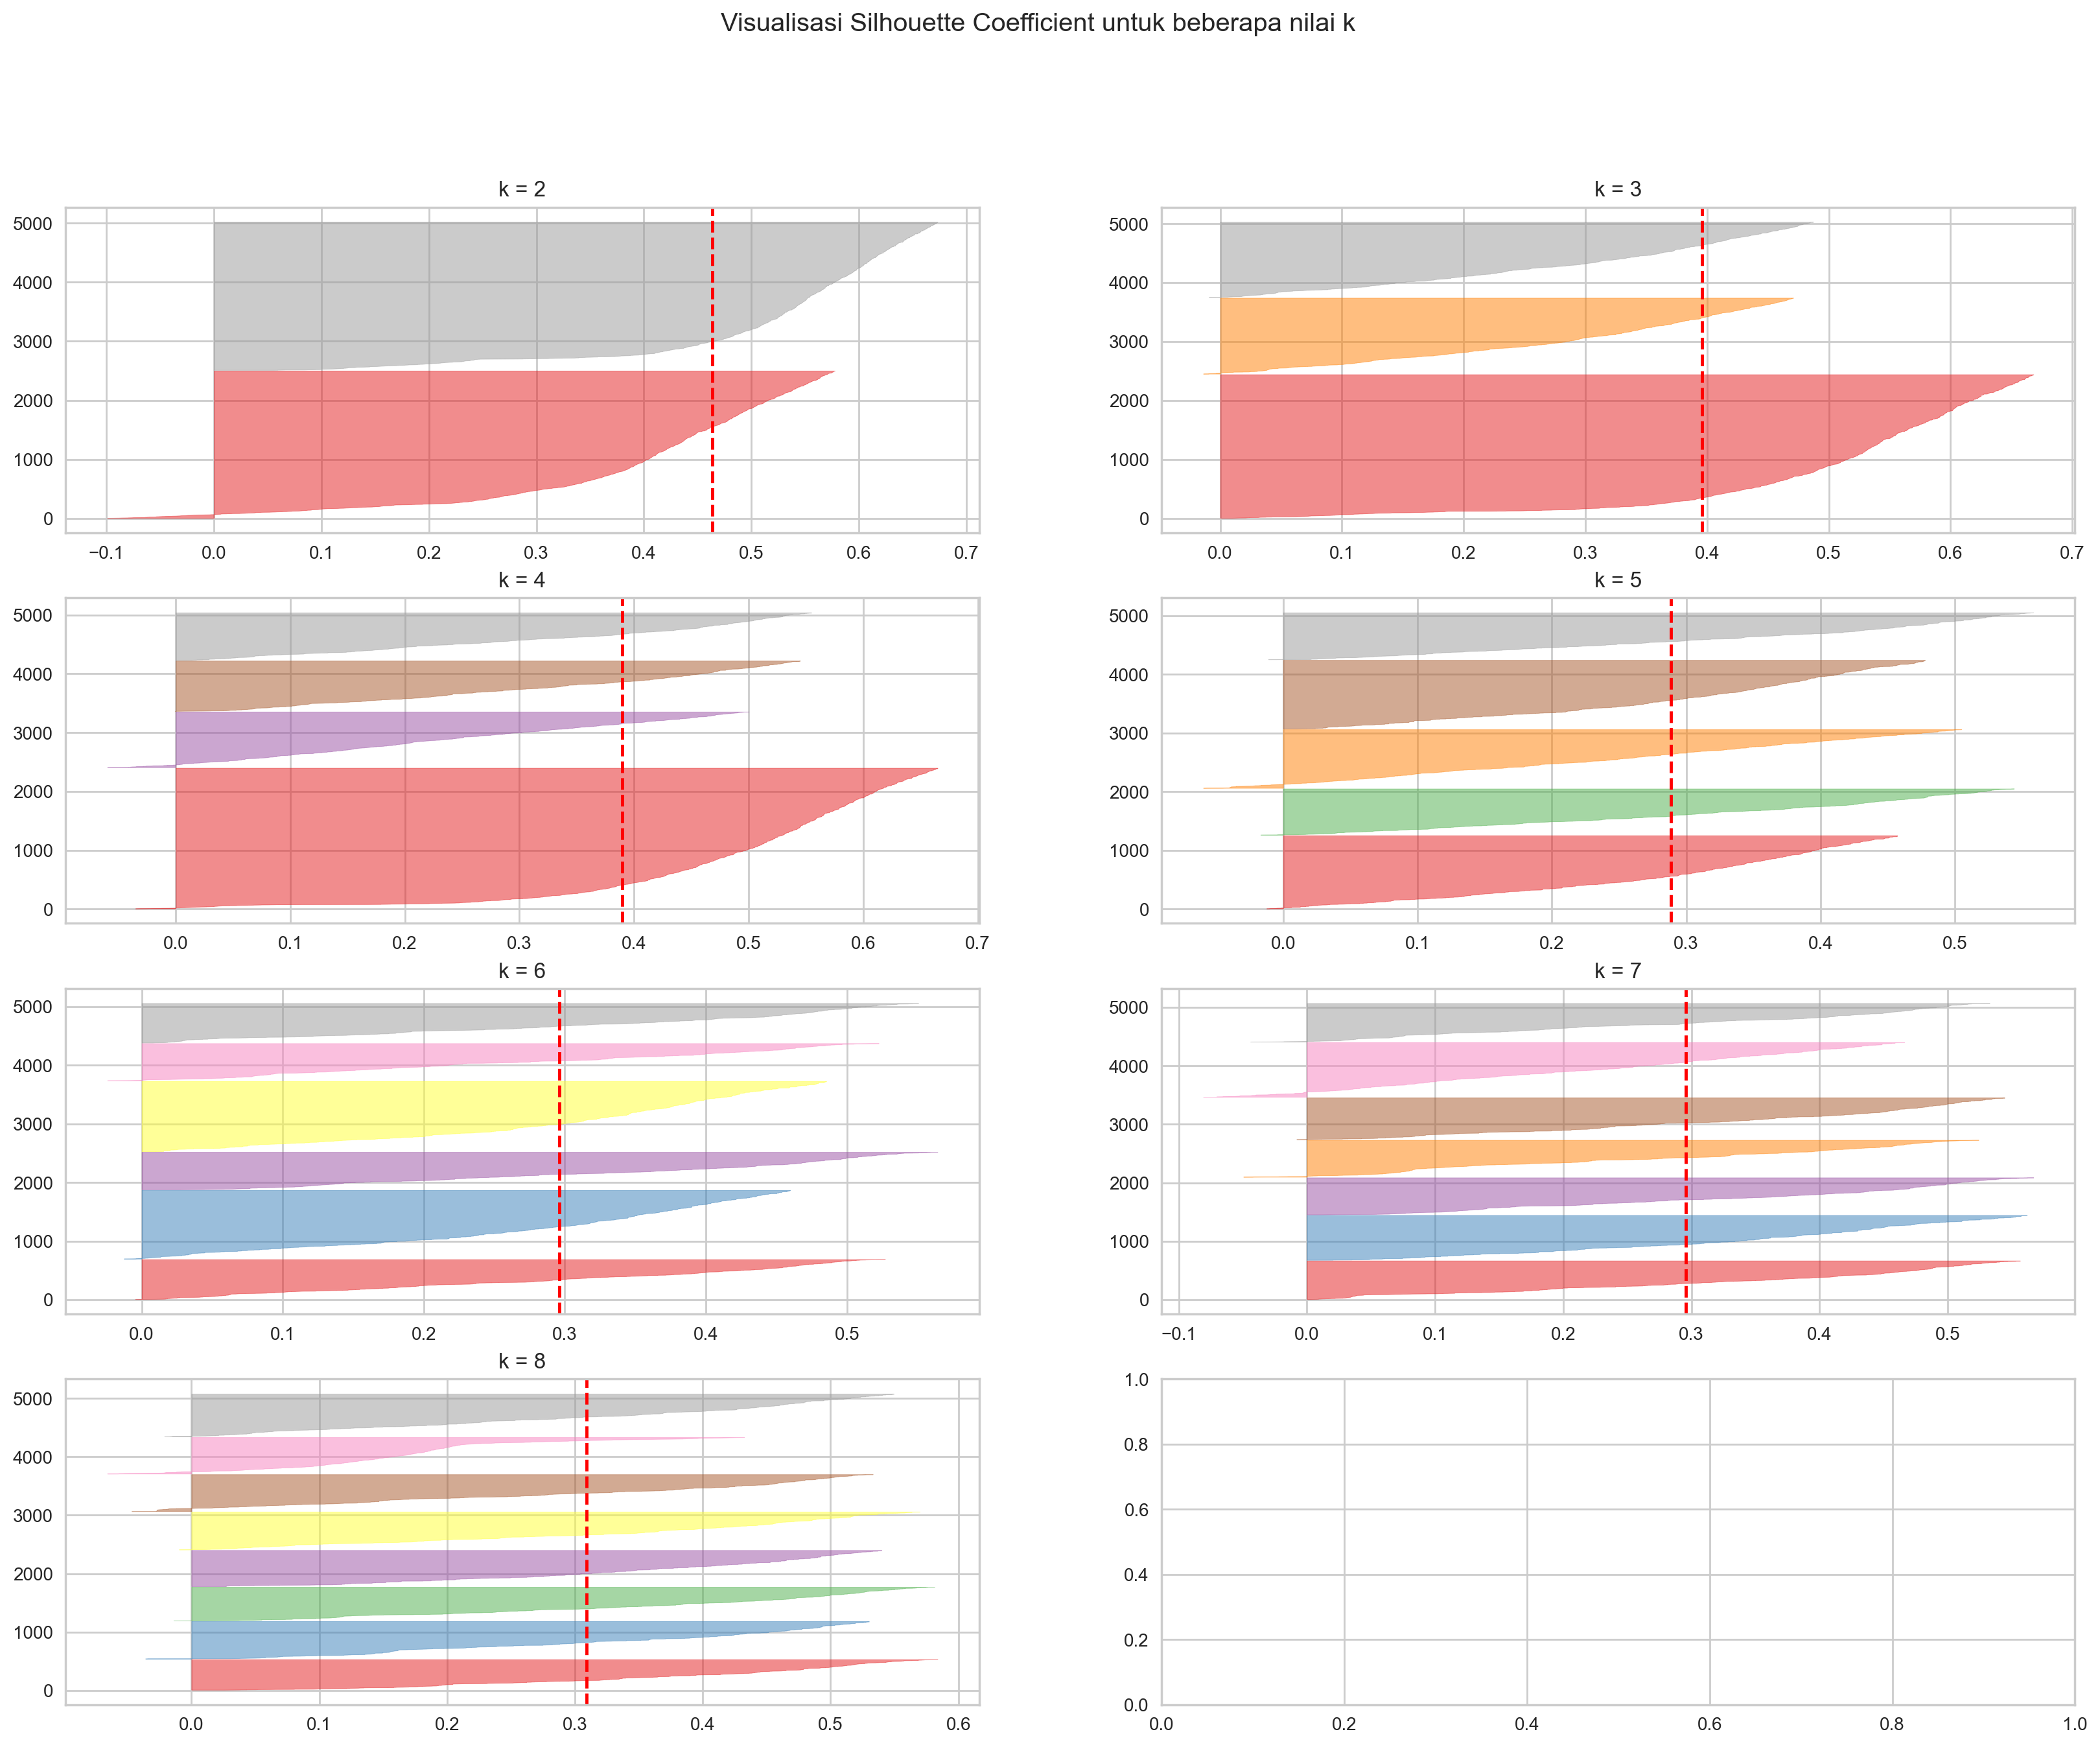

In [ ]:
# TODO: visualisasi silhouette
fig, ax = plt.subplots(4, 2, figsize=(20,15))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for k in range(2,len+1):
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    q, mod = divmod(k, 2)
    ax[q-1][mod].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax = ax[q-1][mod])
    visualizer.fit(df_clustering)


Pada dataset diambil fitur 2 numerikal dan 1 kategorikal, yaitu income, total_juice_expenses, dan education. nilai K= 2 adalah yang paling optimal karena menghasilkan skor yang paling tinggi, yakni sekitar 0.44 untuk silhouette_coefficient. Mesikpun begitu, nilai 0.44 masih memiliki struktur klaster yang lemah. Grafik pun juga menunjukkan jumlah Kluster = 2 yang paling optimal karena densitas dua klaster tidak berbeda jauh dan tiap klaster telah melebihi reratanya (melebihi garis merah vertikal).

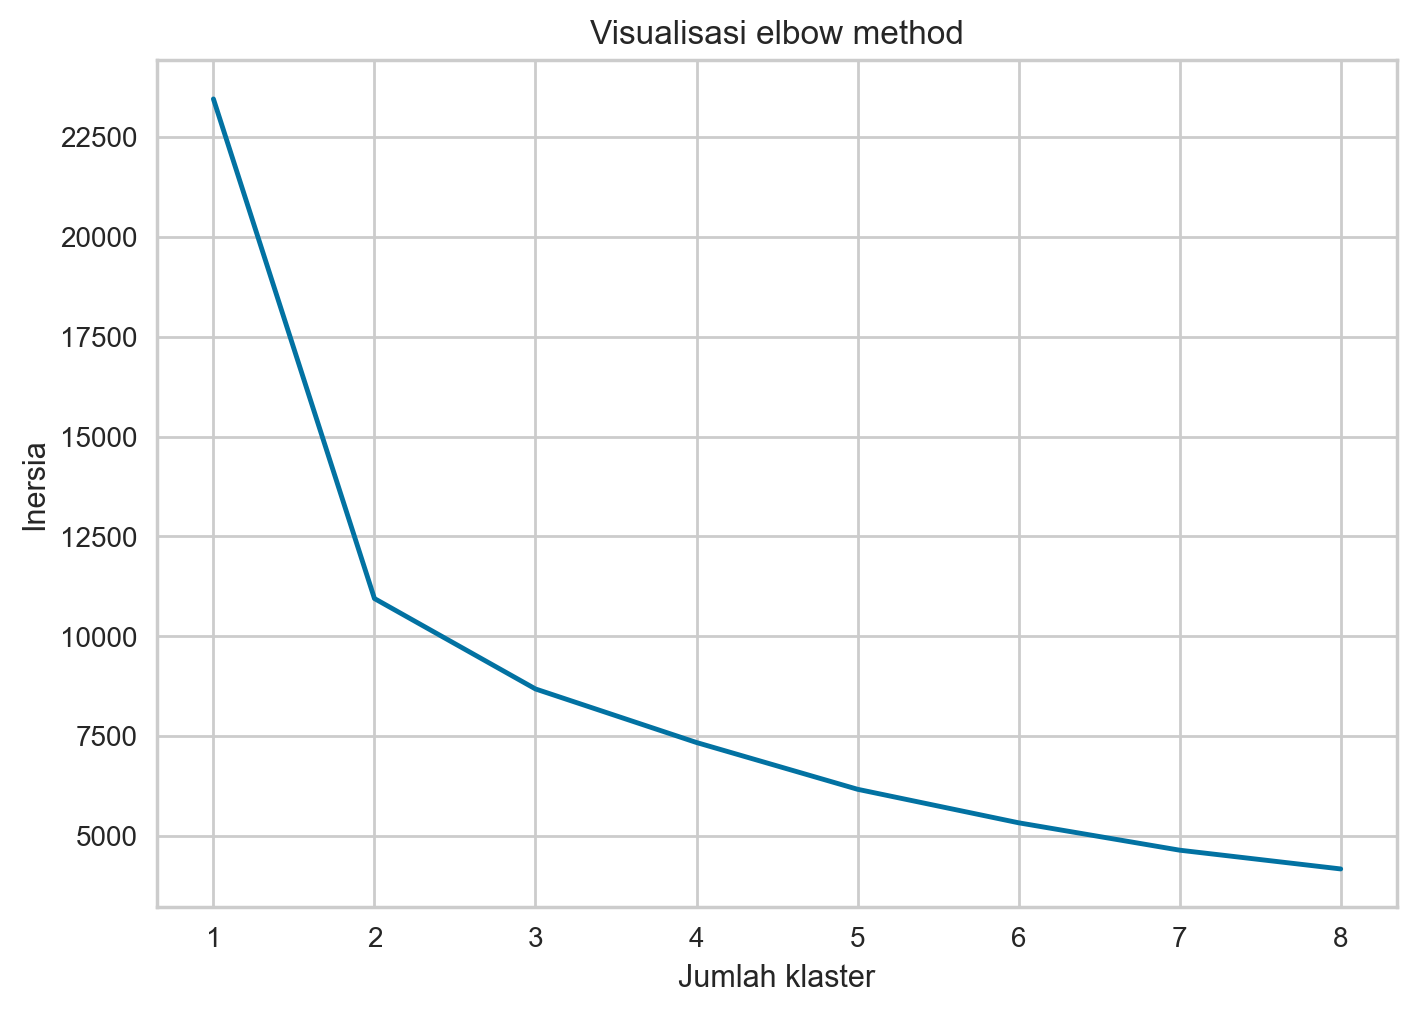

In [ ]:
# TODO: visualisasi elbow method
# Visualisasi inertia (sum of squared distances) dengan elbow method
inertia = []
for cluster in range(1, len+1):
    km = KMeans(n_clusters=cluster)
    km = km.fit(df_clustering)
    inertia.append(km.inertia_)

plt.plot(range(1, len+1), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()


Pada visual dengan metode elbow,  Tujuan utamanya adalah mencari inersia terendah dengan jumlah klaster yang sedikit. Dari grafik tersebut, titik belok terjadi ketika jumlah klaster adalah 2. Kedua metode tersebut (silhouette dan elbow) menghasilkan jumlah klaster yang sama. Dengan demikian, jumlah kluster yang paling optimal dari rentang 2 hingga 8 adalah 2.

In [ ]:
# TODO: latih model
# Mendefinisikan model dengan jumlah klaster = 2
kmeans = KMeans(n_clusters=2)
cluster_kmeans= kmeans.fit_predict(df_clustering)

In [ ]:
# Append hasil clustering ke dataframe
df_with_clusters = pd.DataFrame(df_clustering.copy())
df_with_clusters['klaster'] = cluster_kmeans
df_with_clusters

,0,1,2,klaster
0,0.687642,-0.747234,1.293101,0
1,-0.961830,1.144542,-0.602808,1
2,1.705924,-0.940431,1.488053,0
3,1.292584,0.322751,-0.741971,0
4,-1.821467,0.022107,-0.864728,1
...,...,...,...,...
4996,-2.114788,1.391998,-0.387077,1
4997,-2.394179,0.242143,0.737042,1
4998,-2.041183,0.125427,-0.255376,1
4999,-1.772954,-0.592047,-0.838073,1


In [ ]:
fitur1=0
fitur2=1
fitur3=2

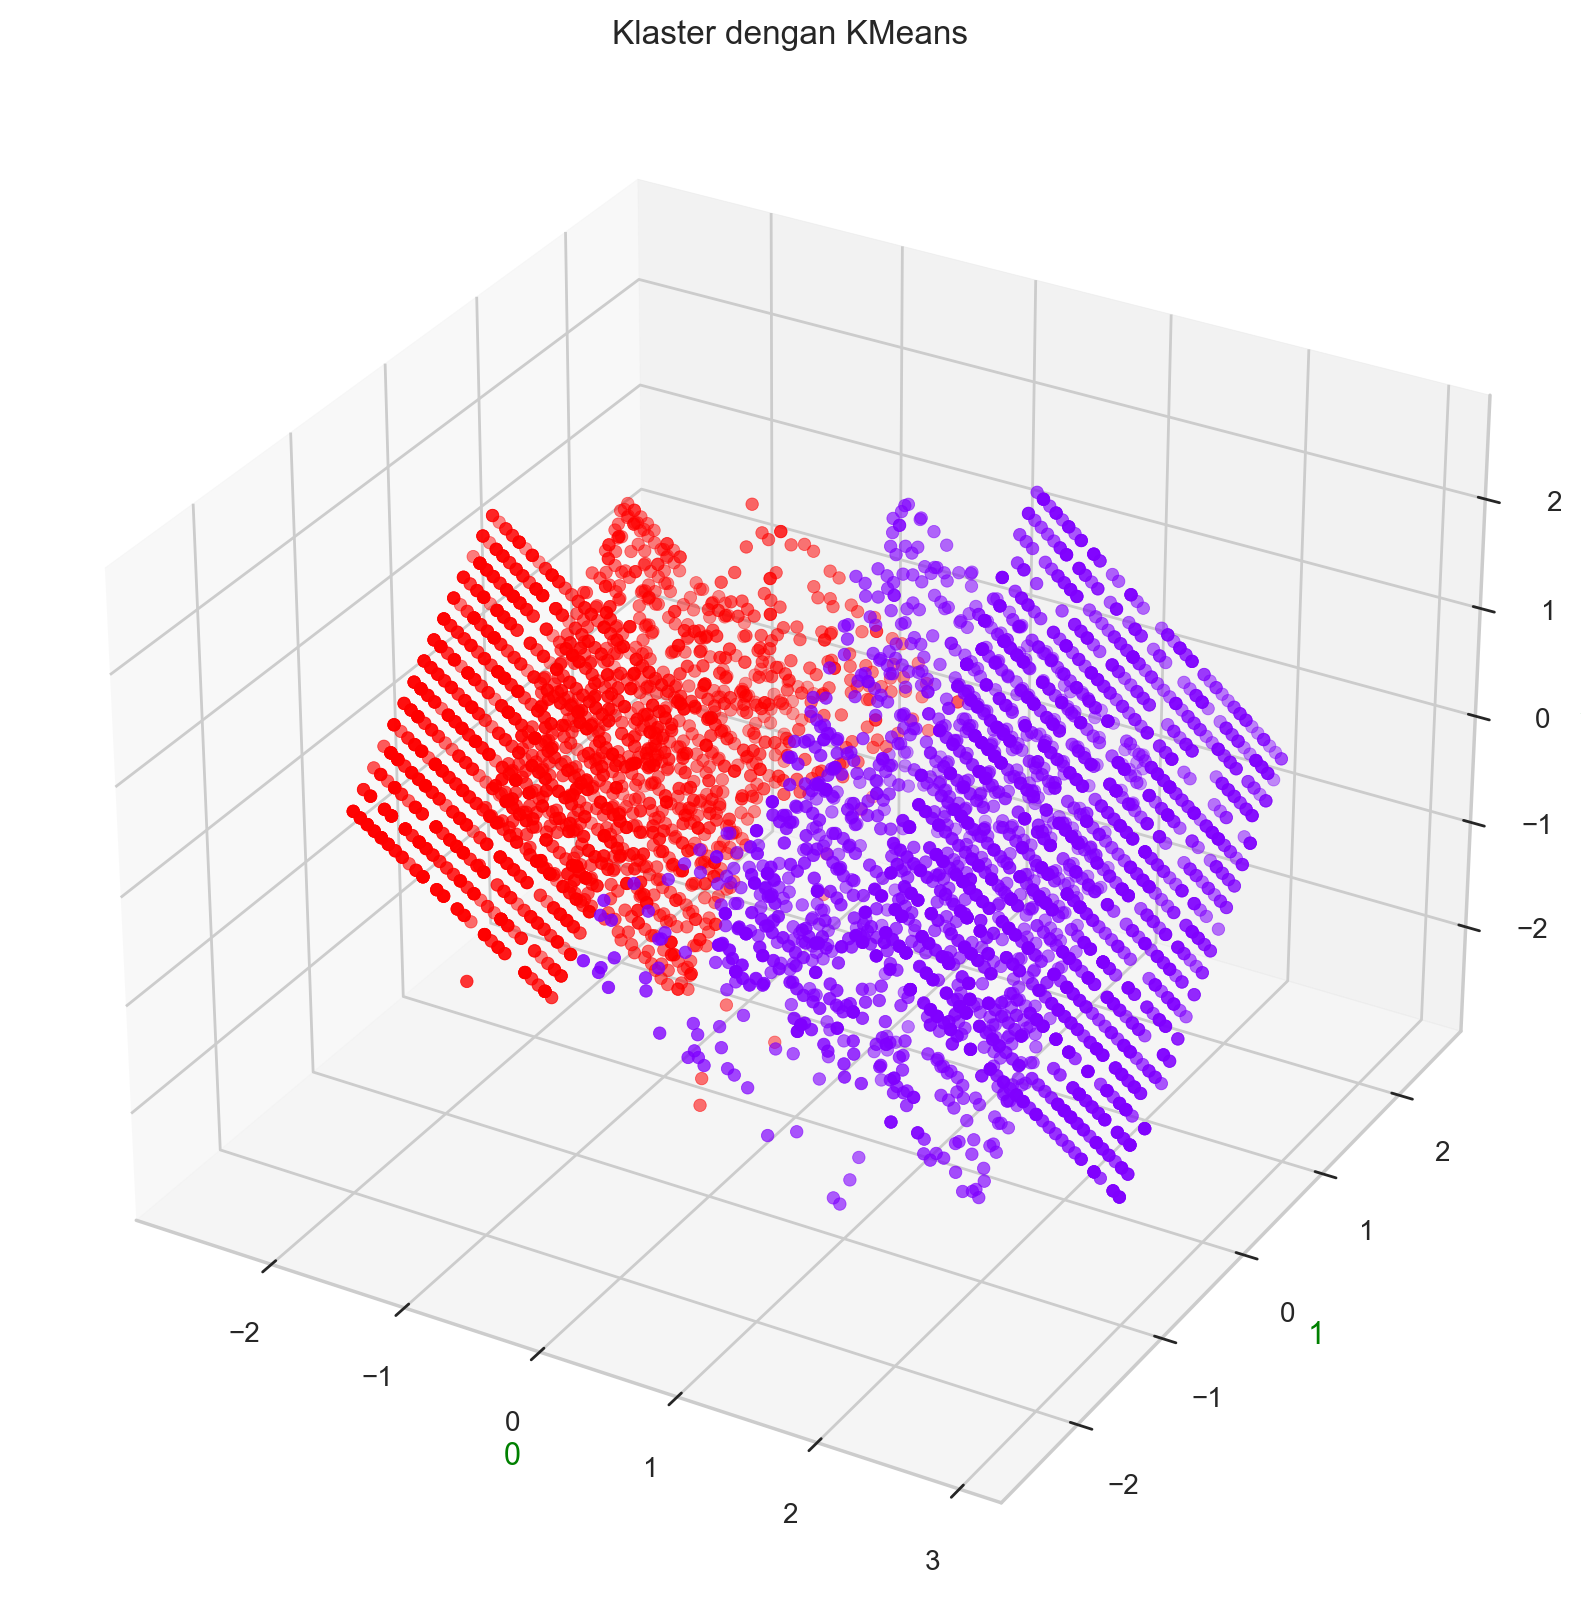

In [ ]:
# TODO: visualisasi
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters[fitur1]
y = df_with_clusters[fitur2]
z = df_with_clusters[fitur3]
cluster = df_with_clusters['klaster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster dengan KMeans")
plt.grid(False)
ax.set_xlabel('%s'%fitur1, color='green')
ax.set_ylabel('%s'%fitur2, color='green')
ax.set_zlabel('%s'%fitur3, color='green')

plt.show()

In [ ]:
# TODO: latih model
# Membuat model sementara untuk divisualisasikan
agglomerative  = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')
cluster_agglomerative = agglomerative.fit(df_clustering)

# Menampilkan label klaster tiap data points
cluster_agglomerative.labels_

array([5000, 4999, 4998, ...,    2,    1,    0], dtype=int64)

In [ ]:
(agglomerative.labels_).size

5001

In [ ]:
# TODO: visualisasi
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = (model.labels_).size
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot dendogram yang dihasilkan
    shc.dendrogram(linkage_matrix, **kwargs)

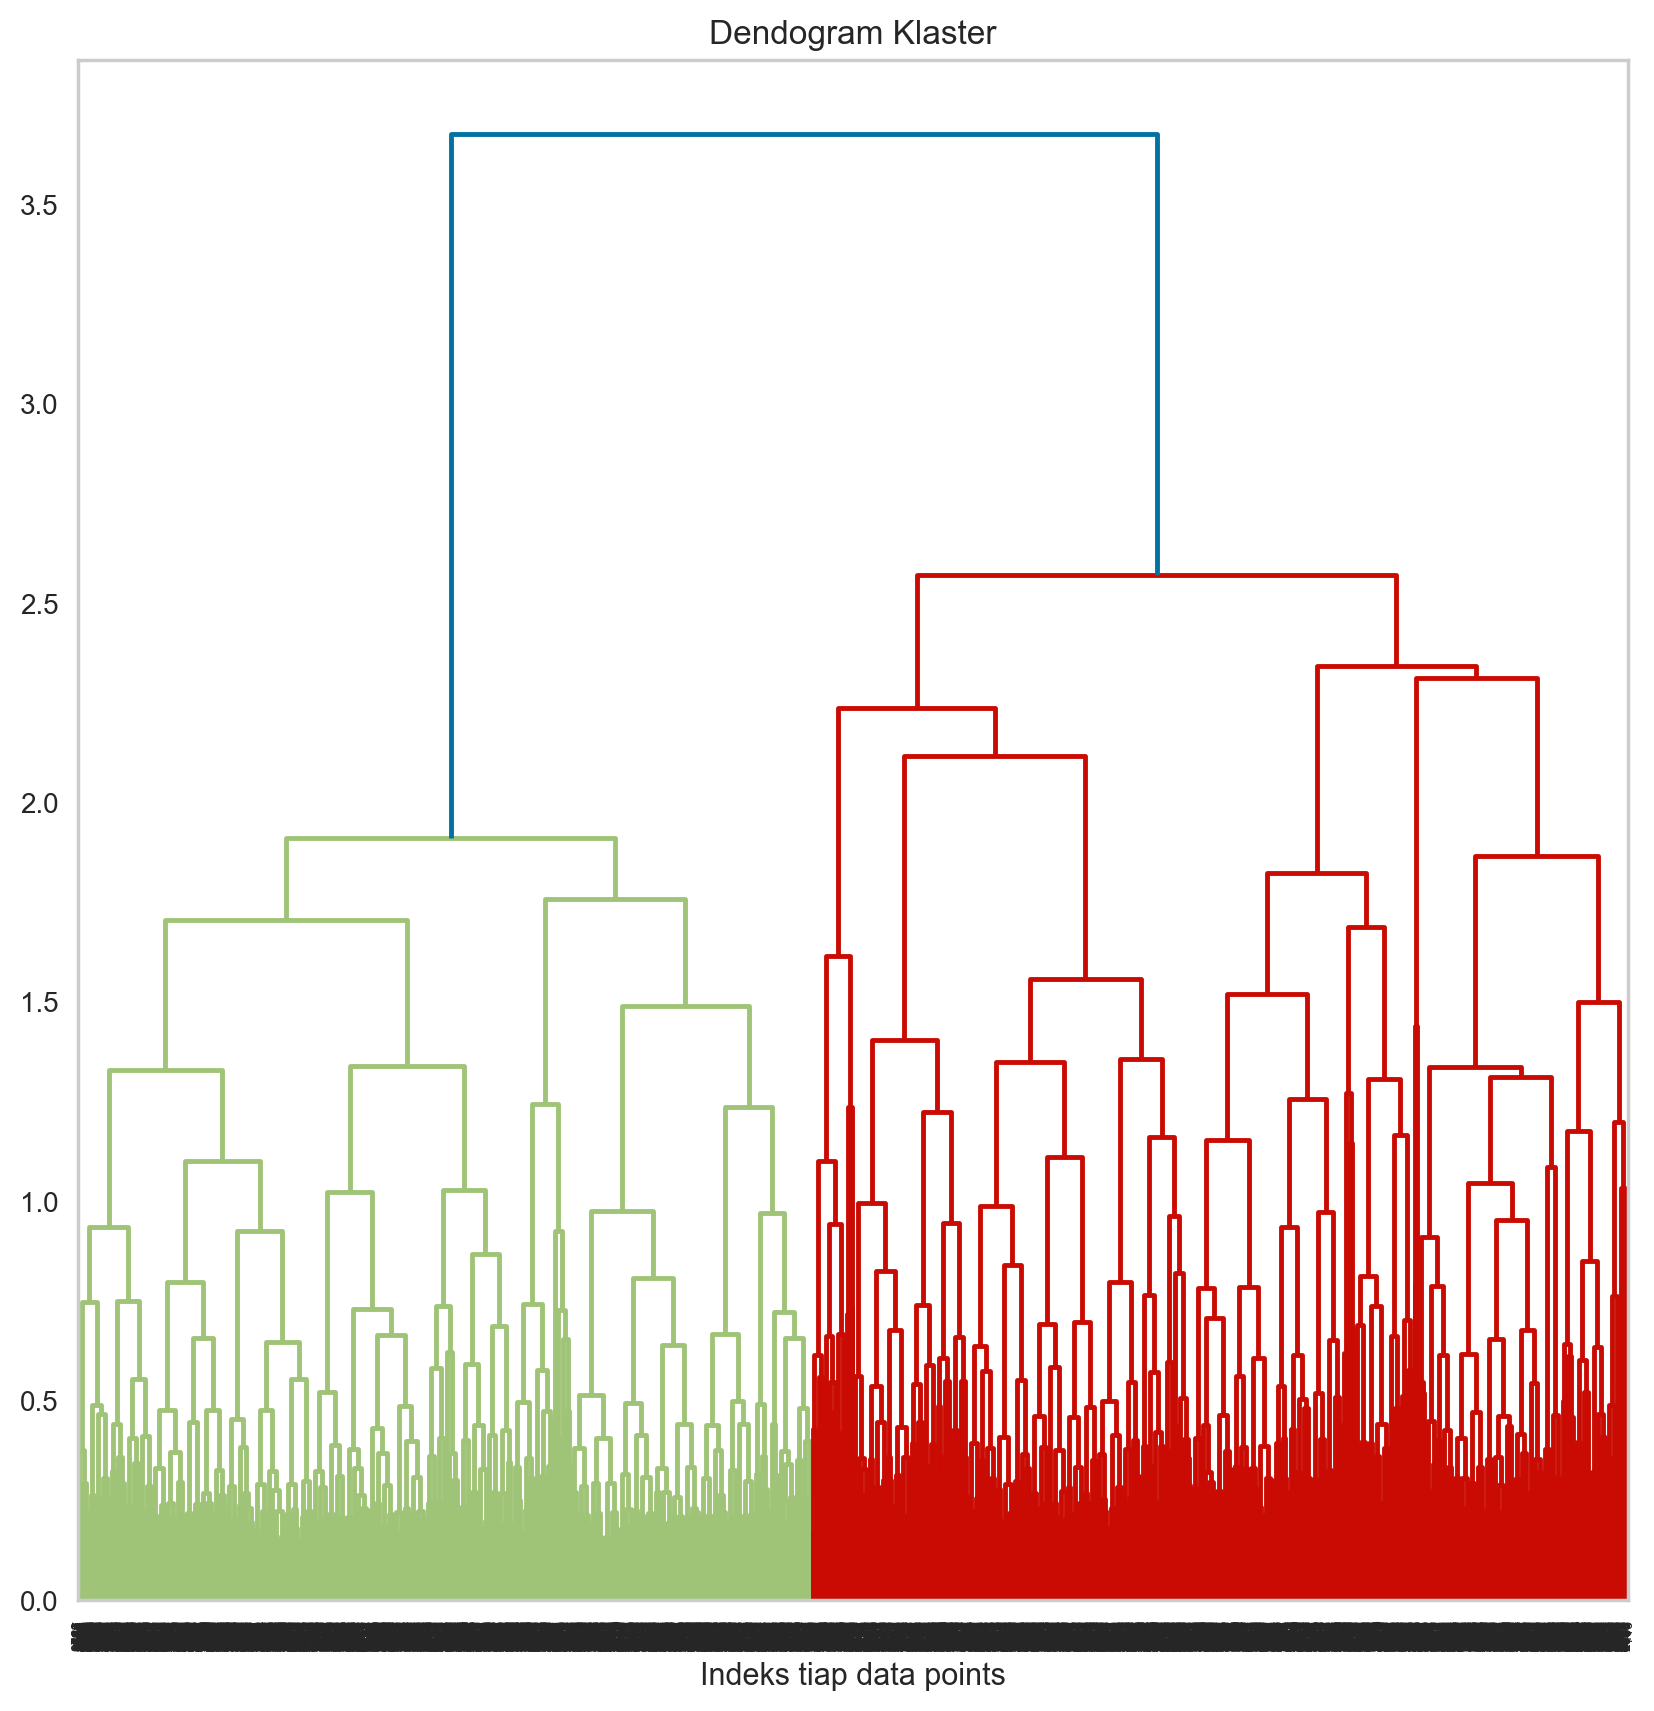

In [ ]:
plt.figure(figsize=(10, 10))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode=None)
plt.title("Dendogram Klaster")
plt.xlabel("Indeks tiap data points")
plt.show()


Dari dendogram diatas, jumlah klaster optimal  adalah 2 seperti hasil K-Means. Terdapat dua cara Untuk menentukan jumlah kluster yang optimal pada dendogram di Python, yakni sebagai berikut:
> 1. Kita dapat menggunakan cara manual, yakni dengan menentukan garis vertikal terpanjang pada dendogram.  Pada hasil dendogram, Garis biru merupakan garis vertikal terpanjang. Dengan demikian, garis dapat ditarik secara horizontal untuk ambang batas sehingga didapat jumlah klaster yang optimal adalah 2.
> 2. Pada python, ketika terjadi percabangan dengan perbedaan yang signifikan, maka python akan otomatis untuk memberikan visualisasi dengan warna yang berbeda. Pada hasil diatas, terdapat 3 warna, yakni biru, hijau, dan merah. Jumlah kluster optimal ditentukan dari  jumlah warna selain biru yang merupakan cabang utama (atau dapat dihitung dari jumlah warna dikurangi satu). Dengan demikian, didapat hasil 3-1 = 2 klaster.

In [ ]:
# TODO: latih model sesuai jumlah klaster optimal
# Definisikan model dengan hasil visualisasi sebelumnya
agglomerative = AgglomerativeClustering(n_clusters=2, linkage='average')
cluster_agglomerative = agglomerative.fit_predict(df_clustering)

In [ ]:
# TODO: visualisasi
df_with_agglomerative = pd.DataFrame(df_clustering.copy())
df_with_agglomerative['klaster'] = cluster_agglomerative
df_with_agglomerative

,0,1,2,klaster
0,0.687642,-0.747234,1.293101,0
1,-0.961830,1.144542,-0.602808,1
2,1.705924,-0.940431,1.488053,0
3,1.292584,0.322751,-0.741971,0
4,-1.821467,0.022107,-0.864728,1
...,...,...,...,...
4996,-2.114788,1.391998,-0.387077,1
4997,-2.394179,0.242143,0.737042,1
4998,-2.041183,0.125427,-0.255376,1
4999,-1.772954,-0.592047,-0.838073,1


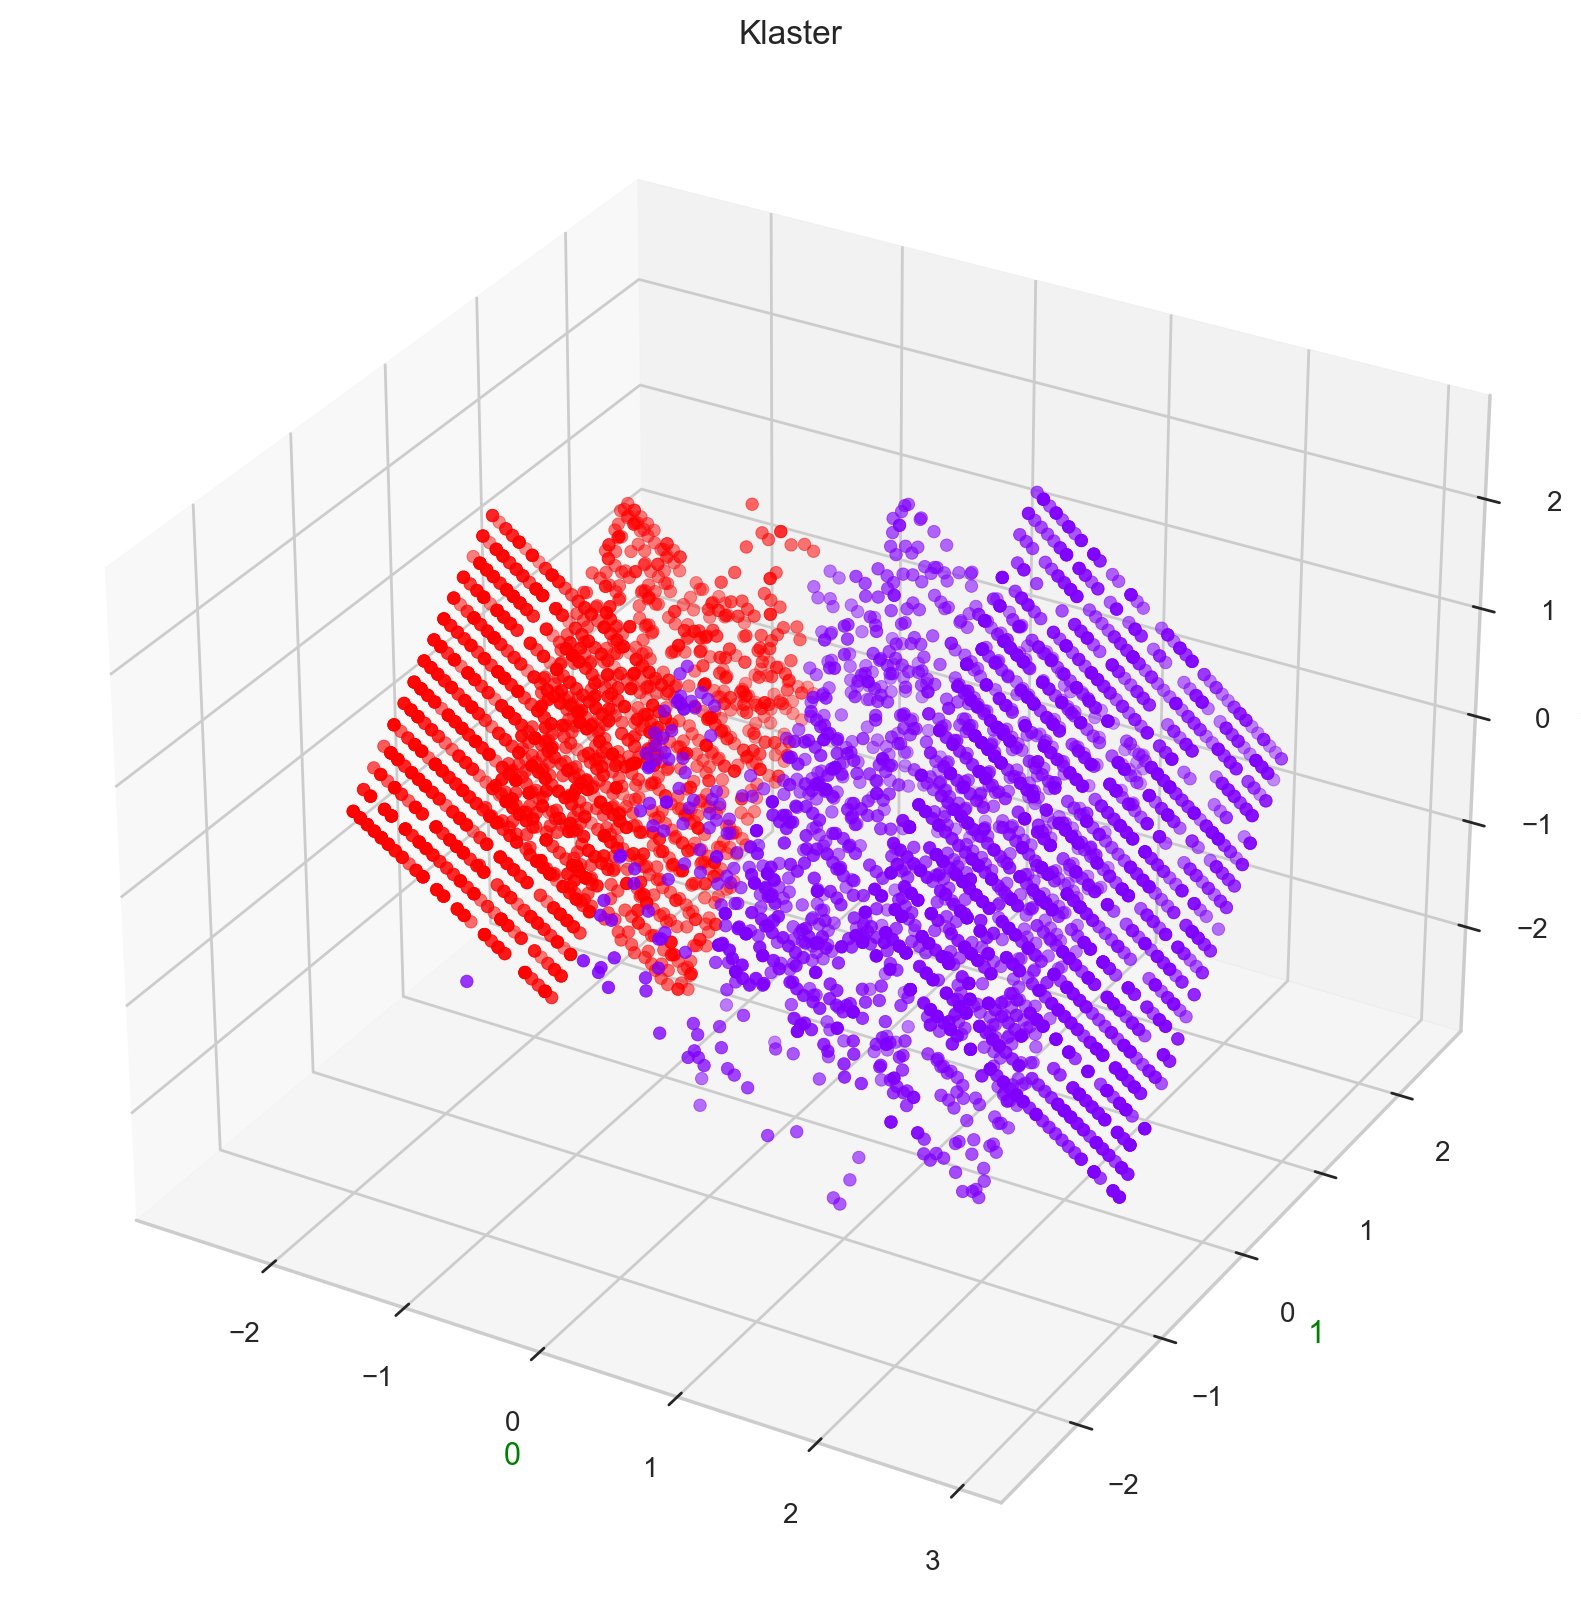

In [ ]:
# TODO: visualisasi
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_agglomerative[fitur1]
y = df_with_agglomerative[fitur2]
z = df_with_agglomerative[fitur3]
cluster = df_with_agglomerative['klaster']
# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap="rainbow" )
plt.title("Klaster")
plt.grid(False)
ax.set_xlabel('%s'%fitur1, color='green')
ax.set_ylabel('%s'%fitur2, color='green')
ax.set_zlabel('%s'%fitur3, color='green')
plt.show()

> TODO: komparasi dengan hasil K-Means<br>
Pada plot diatas, klaster ungu merupakan klaster merah pada K-Means dan klaster merah merupakan klaster ungu pada K-means. Dari visualisasi diatas, penyebaran data yang dihasilkan dari clustering menggunakan metode agglomerative memiliki hasil yang sangat identik dengan metode K-Means.

In [ ]:
# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils import type_metric, distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder
from sklearn.metrics.cluster import contingency_matrix


In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)


In [ ]:
distance_measures = {'euclidean': 0, 'minkowski': 4, 'chi-square': 6}
X=df_clustering.iloc[:, :].values
y=pd.read_csv('gender.csv').iloc[:, -1].values
# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 2, random_state=5).initialize()
    # instance created for respective distance metric
    if dist_measure ==0:
        instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(type_metric.EUCLIDEAN))
    elif dist_measure ==4:
        instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(type_metric.MINKOWSKI, degree=4))
    elif dist_measure ==6:
         instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(type_metric.CHI_SQUARE))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

The purity score for euclidean distance is 96.86%
The purity score for minkowski distance is 96.86%
The purity score for chi-square distance is 96.96%
